In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Importo los datos de los usuarios

In [2]:
# Ahora nos vamos con los ficheros de tipo Excel 
mainpath_xls = "C:/Users/l_jor/OneDrive/Documents/Jorge R/Personal"
filename = "Historico Registro BUD 2007-202002.xlsx"


#Ojo para leer un Excel hay que agregarle el nombre de la hoja (sheet)

df_usuarios = pd.read_excel(mainpath_xls + "/" + filename, "GENTE")

In [3]:
df_usuarios.head()

,codnino,fechanacimiento,FechaCreacion,FechaModificacion
0,133944,1989-12-06 00:00:00.000,2020-03-10 17:28:39.313,NaN
1,134063,1992-08-29 00:00:00.000,2020-03-10 17:28:39.313,NaN
2,134075,1995-12-22 00:00:00.000,2020-03-10 17:28:39.313,NaN
3,134077,2002-06-06 00:00:00.000,2020-03-10 17:28:39.313,NaN
4,134105,1991-07-29 00:00:00.000,2020-03-10 17:28:39.313,NaN


## Importo los datos de los ingresos

In [4]:
df_ingresos = pd.read_excel(mainpath_xls + "/" + filename, "INGRESOS", header = 0, skiprows = 1)

In [5]:
df_ingresos.head()

,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,FechaCreacion,FechaModificacion
0,3226859,1090176,363164,2007-06-07 00:00:00.000,100,2020-03-10 17:28:01.247,NaN
1,3226860,1090176,871517,2007-06-08 00:00:00.000,100,2020-03-10 17:28:01.247,NaN
2,3226861,1090176,572323,2007-06-08 00:00:00.000,100,2020-03-10 17:28:01.247,NaN
3,3226862,1090176,663168,2007-06-08 00:00:00.000,100,2020-03-10 17:28:01.247,NaN
4,3226863,1090176,332961,2007-06-08 00:00:00.000,100,2020-03-10 17:28:01.247,NaN


## Limpio los datos de los usuarios que no me interesan

In [6]:
undesired_columns_users = ["FechaCreacion", "FechaModificacion"]
all_columns_list = df_usuarios.columns.values.tolist()
sublist = [x for x in all_columns_list if x not in undesired_columns_users]
df_usuarios = df_usuarios[sublist]
df_usuarios.head()

,codnino,fechanacimiento
0,133944,1989-12-06 00:00:00.000
1,134063,1992-08-29 00:00:00.000
2,134075,1995-12-22 00:00:00.000
3,134077,2002-06-06 00:00:00.000
4,134105,1991-07-29 00:00:00.000


## Limpio los datos de los ingresos que no me interesan

In [7]:
undesired_columns_compras = ["FechaCreacion", "FechaModificacion"]
all_columns_list = df_ingresos.columns.values.tolist()
sublist = [x for x in all_columns_list if x not in undesired_columns_users]
df_ingresos = df_ingresos[sublist]
df_ingresos.head()

,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion
0,3226859,1090176,363164,2007-06-07 00:00:00.000,100
1,3226860,1090176,871517,2007-06-08 00:00:00.000,100
2,3226861,1090176,572323,2007-06-08 00:00:00.000,100
3,3226862,1090176,663168,2007-06-08 00:00:00.000,100
4,3226863,1090176,332961,2007-06-08 00:00:00.000,100


# Hago validaciones de la informacion clientes e ingresos

In [8]:
# Primero reviso si hay codigos de clientes repetidos
df_dup = df_usuarios.duplicated(subset="codnino")
data_dup = pd.DataFrame(
    {
        "dup" : df_dup
     }
)
data_dup[(data_dup["dup"]==1)]

,dup


In [9]:
# Ahora reviso si hay codigos de clientes vacios
len(df_usuarios[pd.isnull(df_usuarios.codnino)])

0

In [10]:
#Reviso si hay fechas de nacimiento vacias
len(df_usuarios[pd.isnull(df_usuarios.fechanacimiento)])

0

In [11]:
#Reviso si hay fechas de ingreso vacias
len(df_ingresos[pd.isnull(df_ingresos.FechaIngreso)])

0

# Uno los datos de usuarios con los ingresos

* Primera posible vista o tabla materializada

In [12]:
# Verifico si hay codigos de usuarios en los ingresos, que no esten en la tabla de usuarios
merged_right = pd.merge(left = df_usuarios, right = df_ingresos,
                        how ="right" , left_on = "codnino", right_on = "CodNino")
len(merged_right[pd.isnull(merged_right.CodNino)])

0

In [13]:
# Verifico si hay codigos de usuarios, que no esten en la tabla de ingresos
merged_left = pd.merge(left = df_usuarios, right = df_ingresos,
                        how ="left" , left_on = "codnino", right_on = "CodNino")
len(merged_left[pd.isnull(merged_right.CodNino)])

0

In [14]:
data = pd.merge(left = df_usuarios, right = df_ingresos,
                        how ="outer" , left_on = "codnino", right_on = "CodNino")
data.head()

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion
0,133944,1989-12-06 00:00:00.000,3292717,1100235,133944,2007-09-05 00:00:00.000,99
1,133944,1989-12-06 00:00:00.000,3329394,1100221,133944,2007-11-12 00:00:00.000,100
2,133944,1989-12-06 00:00:00.000,3518567,1100225,133944,2009-01-21 00:00:00.000,103
3,133944,1989-12-06 00:00:00.000,3586051,1100235,133944,2009-07-22 00:00:00.000,99
4,133944,1989-12-06 00:00:00.000,3724427,1140018,133944,2009-07-22 00:00:00.000,99


# Agrego la edad de ingreso al data set

In [15]:
data["Edad"] = ((pd.to_datetime(data["FechaIngreso"])).apply(lambda x: x.year) - 
                pd.to_datetime(data["fechanacimiento"]).apply(lambda x: x.year))

In [16]:
data.head()

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,Edad
0,133944,1989-12-06 00:00:00.000,3292717,1100235,133944,2007-09-05 00:00:00.000,99,18
1,133944,1989-12-06 00:00:00.000,3329394,1100221,133944,2007-11-12 00:00:00.000,100,18
2,133944,1989-12-06 00:00:00.000,3518567,1100225,133944,2009-01-21 00:00:00.000,103,20
3,133944,1989-12-06 00:00:00.000,3586051,1100235,133944,2009-07-22 00:00:00.000,99,20
4,133944,1989-12-06 00:00:00.000,3724427,1140018,133944,2009-07-22 00:00:00.000,99,20


# Histograma por edad

Text(0.5, 1.0, 'Histograma por edad')

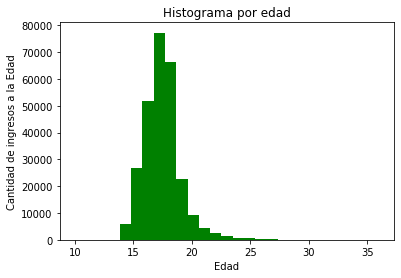

In [17]:
plt.hist(data["Edad"], facecolor='g', label = 'str', bins = 27)
plt.xlabel('Edad')
plt.ylabel('Cantidad de ingresos a la Edad')
plt.title('Histograma por edad')

In [18]:
data["Edad"].describe()

count    270213.000000
mean         17.268684
std           1.677386
min          10.000000
25%          16.000000
50%          17.000000
75%          18.000000
max          36.000000
Name: Edad, dtype: float64

# Histograma por fechas

In [19]:
AnoMesIngreso = pd.to_datetime(data["FechaIngreso"]).apply(lambda x: str(x.year))+'-'+pd.to_datetime(data["FechaIngreso"]).apply(lambda x: str(x.month))
AnoIngreso = pd.to_datetime(data["FechaIngreso"]).apply(lambda x: x.year)
MesIngreso = pd.to_datetime(data["FechaIngreso"]).apply(lambda x: x.month)

Fecha_Ingreso = pd.DataFrame(
    {
        "date": AnoMesIngreso,
        "year" : AnoIngreso,
        "month" : MesIngreso
     }
)

In [20]:
Fecha_Ingreso.describe()

,year,month
count,270213.000000,270213.000000
mean,2012.882330,6.526966
std,3.436619,3.426066
min,2007.000000,1.000000
25%,2010.000000,4.000000
50%,2013.000000,7.000000
75%,2016.000000,10.000000
max,2020.000000,12.000000


Text(0.5, 1.0, 'Histograma por año')

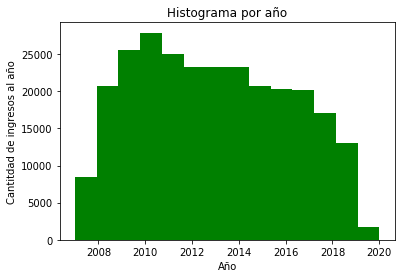

In [21]:
plt.hist(Fecha_Ingreso["year"], facecolor='g', bins = 14)
plt.xlabel('Año')
plt.ylabel('Cantitdad de ingresos al año')
plt.title('Histograma por año')


In [22]:
grouped_year = Fecha_Ingreso.groupby("year")
grouped_year.size()

year
2007     8506
2008    20657
2009    25488
2010    27874
2011    25002
2012    23308
2013    23291
2014    23199
2015    20656
2016    20297
2017    20168
2018    17029
2019    12974
2020     1764
dtype: int64

In [23]:
Fecha_2007=Fecha_Ingreso[(Fecha_Ingreso["year"]==2007)]
Fecha_2008=Fecha_Ingreso[(Fecha_Ingreso["year"]==2008)]
Fecha_2009=Fecha_Ingreso[(Fecha_Ingreso["year"]==2009)]
Fecha_2010=Fecha_Ingreso[(Fecha_Ingreso["year"]==2010)]
Fecha_2011=Fecha_Ingreso[(Fecha_Ingreso["year"]==2011)]
Fecha_2012=Fecha_Ingreso[(Fecha_Ingreso["year"]==2012)]
Fecha_2013=Fecha_Ingreso[(Fecha_Ingreso["year"]==2013)]
Fecha_2014=Fecha_Ingreso[(Fecha_Ingreso["year"]==2014)]
Fecha_2015=Fecha_Ingreso[(Fecha_Ingreso["year"]==2015)]
Fecha_2016=Fecha_Ingreso[(Fecha_Ingreso["year"]==2016)]
Fecha_2017=Fecha_Ingreso[(Fecha_Ingreso["year"]==2017)]
Fecha_2018=Fecha_Ingreso[(Fecha_Ingreso["year"]==2018)]
Fecha_2019=Fecha_Ingreso[(Fecha_Ingreso["year"]==2019)]
Fecha_2020=Fecha_Ingreso[(Fecha_Ingreso["year"]==2020)]

Text(0.5, 1.0, 'Histograma Mes en el 2007')

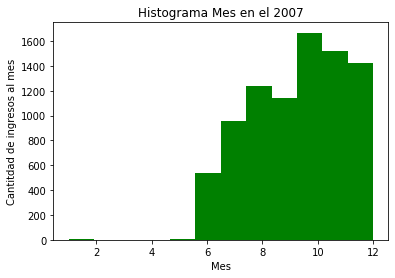

In [24]:
plt.hist(Fecha_2007["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2007')


Text(0.5, 1.0, 'Histograma Mes en el 2008')

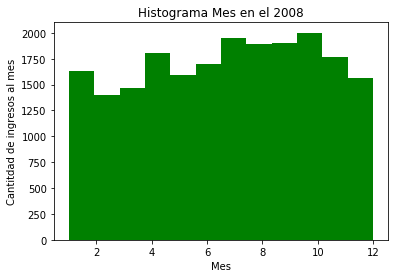

In [25]:
plt.hist(Fecha_2008["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2008')

Text(0.5, 1.0, 'Histograma Mes en el 2009')

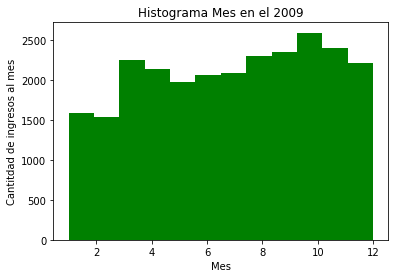

In [26]:
plt.hist(Fecha_2009["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2009')

Text(0.5, 1.0, 'Histograma Mes en el 2010')

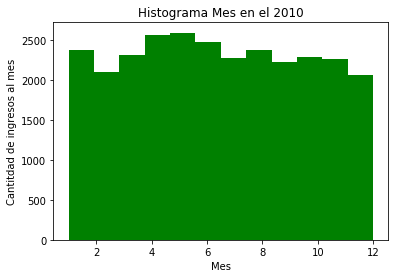

In [27]:
plt.hist(Fecha_2010["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2010')

Text(0.5, 1.0, 'Histograma Mes en el 2011')

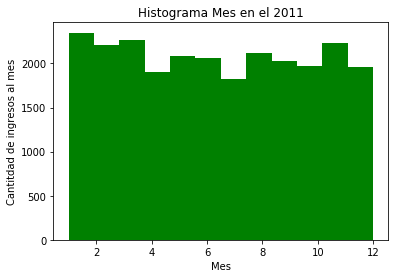

In [28]:
plt.hist(Fecha_2011["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2011')

Text(0.5, 1.0, 'Histograma Mes en el 2012')

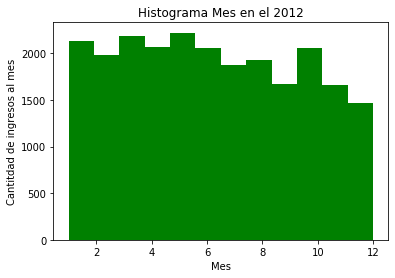

In [29]:
plt.hist(Fecha_2012["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2012')

Text(0.5, 1.0, 'Histograma Mes en el 2013')

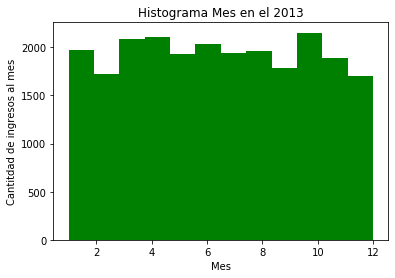

In [30]:
plt.hist(Fecha_2013["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2013')

Text(0.5, 1.0, 'Histograma Mes en el 2014')

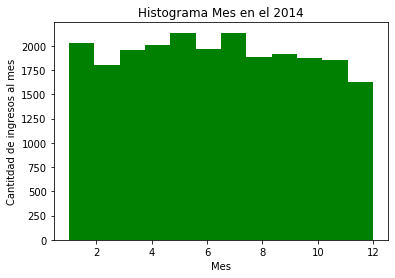

In [31]:
plt.hist(Fecha_2014["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2014')

Text(0.5, 1.0, 'Histograma Mes en el 2015')

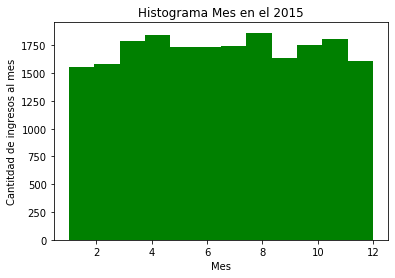

In [32]:
plt.hist(Fecha_2015["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2015')

Text(0.5, 1.0, 'Histograma Mes en el 2016')

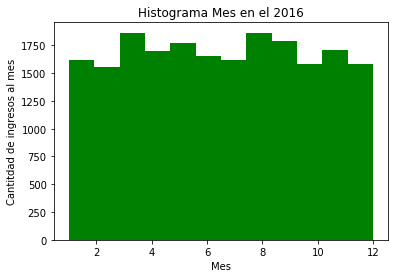

In [33]:
plt.hist(Fecha_2016["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2016')

Text(0.5, 1.0, 'Histograma Mes en el 2017')

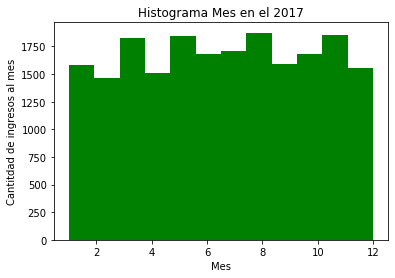

In [34]:
plt.hist(Fecha_2017["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2017')

Text(0.5, 1.0, 'Histograma Mes en el 2018')

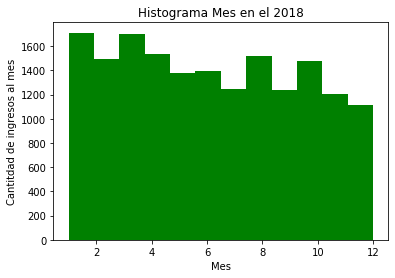

In [35]:
plt.hist(Fecha_2018["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2018')

Text(0.5, 1.0, 'Histograma Mes en el 2019')

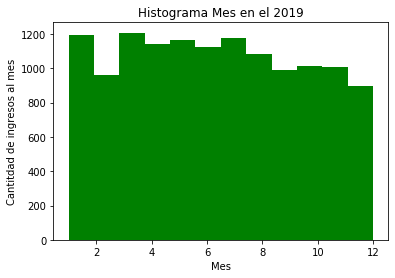

In [36]:
plt.hist(Fecha_2019["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2019')

Text(0.5, 1.0, 'Histograma Mes en el 2020')

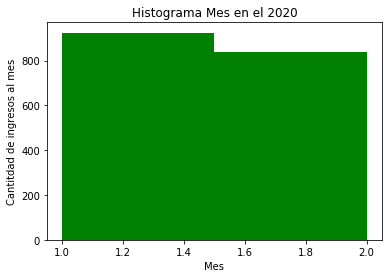

In [37]:
plt.hist(Fecha_2020["month"], facecolor='g', bins = 2)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2020')

# Cantidad de ingresos por niño

In [38]:
data.head()

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,Edad
0,133944,1989-12-06 00:00:00.000,3292717,1100235,133944,2007-09-05 00:00:00.000,99,18
1,133944,1989-12-06 00:00:00.000,3329394,1100221,133944,2007-11-12 00:00:00.000,100,18
2,133944,1989-12-06 00:00:00.000,3518567,1100225,133944,2009-01-21 00:00:00.000,103,20
3,133944,1989-12-06 00:00:00.000,3586051,1100235,133944,2009-07-22 00:00:00.000,99,20
4,133944,1989-12-06 00:00:00.000,3724427,1140018,133944,2009-07-22 00:00:00.000,99,20


In [39]:
grouped_nino = data.groupby("CodNino")
grouped_nino.size()
cantidad_delitos_nino = grouped_nino.size()
cantidad_delitos_nino.describe()

count    77033.000000
mean         3.507756
std          3.951311
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         62.000000
dtype: float64

Text(0.5, 1.0, 'Histograma Cantidad de ingresos x niño')

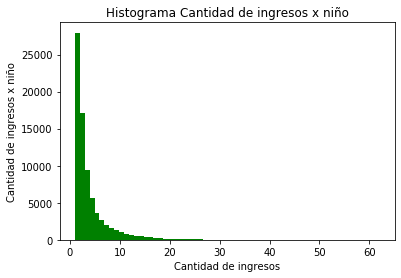

In [40]:
plt.hist(cantidad_delitos_nino, facecolor='g', bins = 62)
plt.xlabel('Cantidad de ingresos')
plt.ylabel('Cantidad de ingresos x niño')
plt.title('Histograma Cantidad de ingresos x niño')

In [41]:
grouped_nino["CodNino"].filter(lambda x: x.count() == 62)

23683    405014
23684    405014
23685    405014
23686    405014
23687    405014
23688    405014
23689    405014
23690    405014
23691    405014
23692    405014
23693    405014
23694    405014
23695    405014
23696    405014
23697    405014
23698    405014
23699    405014
23700    405014
23701    405014
23702    405014
23703    405014
23704    405014
23705    405014
23706    405014
23707    405014
23708    405014
23709    405014
23710    405014
23711    405014
23712    405014
          ...  
23715    405014
23716    405014
23717    405014
23718    405014
23719    405014
23720    405014
23721    405014
23722    405014
23723    405014
23724    405014
23725    405014
23726    405014
23727    405014
23728    405014
23729    405014
23730    405014
23731    405014
23732    405014
23733    405014
23734    405014
23735    405014
23736    405014
23737    405014
23738    405014
23739    405014
23740    405014
23741    405014
23742    405014
23743    405014
23744    405014
Name: CodNino, Length: 6

In [42]:
data[data["CodNino"]== 405014]

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,Edad
23683,405014,1994-01-20 00:00:00.000,3400858,1020125,405014,2008-04-16 00:00:00.000,102,14
23684,405014,1994-01-20 00:00:00.000,3458900,1020118,405014,2008-09-12 00:00:00.000,103,14
23685,405014,1994-01-20 00:00:00.000,3461252,1020117,405014,2008-09-12 00:00:00.000,99,14
23686,405014,1994-01-20 00:00:00.000,3525135,1020125,405014,2009-02-11 00:00:00.000,102,15
23687,405014,1994-01-20 00:00:00.000,3539222,1020116,405014,2009-03-27 00:00:00.000,77,15
23688,405014,1994-01-20 00:00:00.000,3561971,1020110,405014,2009-05-26 00:00:00.000,100,15
23689,405014,1994-01-20 00:00:00.000,3594488,1020117,405014,2009-08-21 00:00:00.000,99,15
23690,405014,1994-01-20 00:00:00.000,3609737,1020125,405014,2009-10-05 00:00:00.000,102,15
23691,405014,1994-01-20 00:00:00.000,3646662,1020110,405014,2010-01-18 00:00:00.000,100,16
23692,405014,1994-01-20 00:00:00.000,3651669,1020118,405014,2010-01-26 00:00:00.000,103,16


# Agrupo entradas de clientes por fechas

In [45]:
# Filtro las fechas de entrada x cliente y elimino los duplicados
sublist = ["CodNino", "FechaIngreso", "Edad"]
df_cliente_fecha = data[sublist]
df_cliente_fecha = df_cliente_fecha.drop_duplicates()
df_cliente_fecha.head()
df_cliente_fecha.shape

(236197, 3)

## Vuelvo a realizar los histogramas en base al filtro anterior

In [46]:
AnoMesIngreso = pd.to_datetime(df_cliente_fecha["FechaIngreso"]).apply(lambda x: str(x.year))+'-'+pd.to_datetime(df_cliente_fecha["FechaIngreso"]).apply(lambda x: str(x.month))
AnoIngreso = pd.to_datetime(df_cliente_fecha["FechaIngreso"]).apply(lambda x: x.year)
MesIngreso = pd.to_datetime(df_cliente_fecha["FechaIngreso"]).apply(lambda x: x.month)

Fecha_Ingreso = pd.DataFrame(
    {
        "date": AnoMesIngreso,
        "year" : AnoIngreso,
        "month" : MesIngreso
     }
)

In [47]:
Fecha_Ingreso.shape

(236197, 3)

Text(0.5, 1.0, 'Histograma por año')

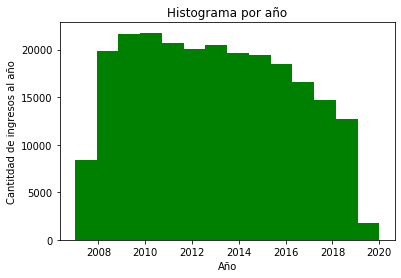

In [48]:
plt.hist(Fecha_Ingreso["year"], facecolor='g', bins = 14)
plt.xlabel('Año')
plt.ylabel('Cantitdad de ingresos al año')
plt.title('Histograma por año')

In [49]:
grouped_year = Fecha_Ingreso.groupby("year")
grouped_year.size()

year
2007     8360
2008    19808
2009    21649
2010    21782
2011    20707
2012    20073
2013    20542
2014    19635
2015    19418
2016    18481
2017    16608
2018    14730
2019    12673
2020     1731
dtype: int64

In [50]:
Fecha_2007=Fecha_Ingreso[(Fecha_Ingreso["year"]==2007)]
Fecha_2008=Fecha_Ingreso[(Fecha_Ingreso["year"]==2008)]
Fecha_2009=Fecha_Ingreso[(Fecha_Ingreso["year"]==2009)]
Fecha_2010=Fecha_Ingreso[(Fecha_Ingreso["year"]==2010)]
Fecha_2011=Fecha_Ingreso[(Fecha_Ingreso["year"]==2011)]
Fecha_2012=Fecha_Ingreso[(Fecha_Ingreso["year"]==2012)]
Fecha_2013=Fecha_Ingreso[(Fecha_Ingreso["year"]==2013)]
Fecha_2014=Fecha_Ingreso[(Fecha_Ingreso["year"]==2014)]
Fecha_2015=Fecha_Ingreso[(Fecha_Ingreso["year"]==2015)]
Fecha_2016=Fecha_Ingreso[(Fecha_Ingreso["year"]==2016)]
Fecha_2017=Fecha_Ingreso[(Fecha_Ingreso["year"]==2017)]
Fecha_2018=Fecha_Ingreso[(Fecha_Ingreso["year"]==2018)]
Fecha_2019=Fecha_Ingreso[(Fecha_Ingreso["year"]==2019)]
Fecha_2020=Fecha_Ingreso[(Fecha_Ingreso["year"]==2020)]

Text(0.5, 1.0, 'Histograma Mes en el 2007')

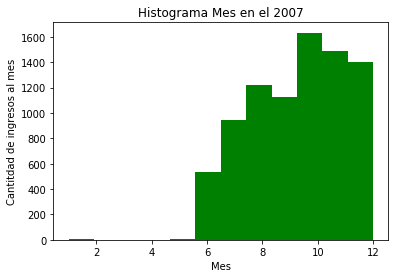

In [51]:
plt.hist(Fecha_2007["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2007')

Text(0.5, 1.0, 'Histograma Mes en el 2008')

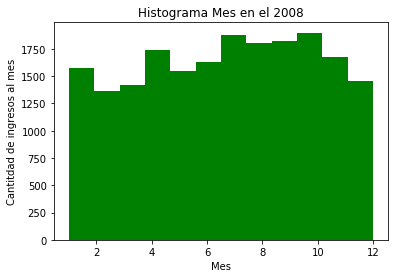

In [52]:
plt.hist(Fecha_2008["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2008')

Text(0.5, 1.0, 'Histograma Mes en el 2009')

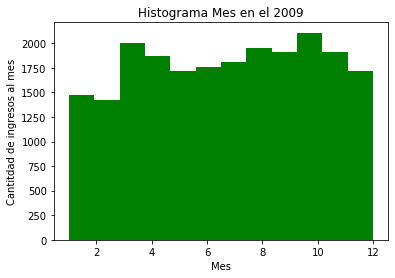

In [53]:
plt.hist(Fecha_2009["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2009')

Text(0.5, 1.0, 'Histograma Mes en el 2010')

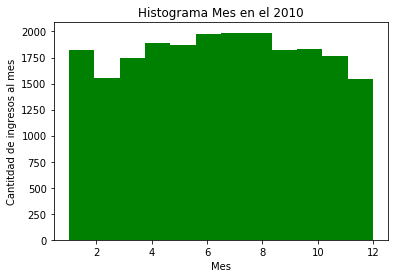

In [54]:
plt.hist(Fecha_2010["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2010')

Text(0.5, 1.0, 'Histograma Mes en el 2011')

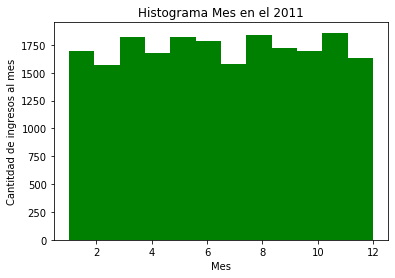

In [55]:
plt.hist(Fecha_2011["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2011')

Text(0.5, 1.0, 'Histograma Mes en el 2012')

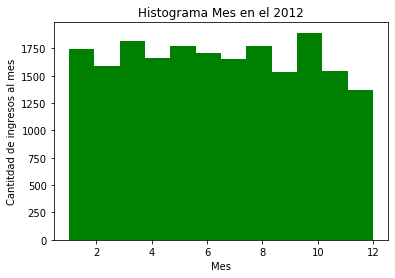

In [56]:
plt.hist(Fecha_2012["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2012')

Text(0.5, 1.0, 'Histograma Mes en el 2013')

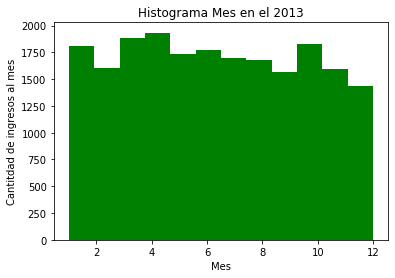

In [57]:
plt.hist(Fecha_2013["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2013')

Text(0.5, 1.0, 'Histograma Mes en el 2014')

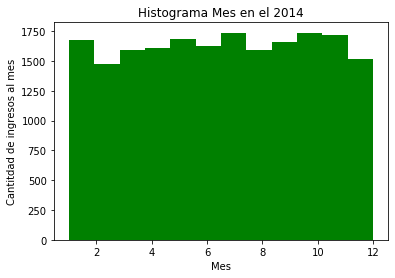

In [58]:
plt.hist(Fecha_2014["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2014')

Text(0.5, 1.0, 'Histograma Mes en el 2015')

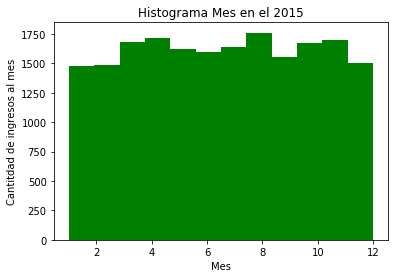

In [59]:
plt.hist(Fecha_2015["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2015')

Text(0.5, 1.0, 'Histograma Mes en el 2016')

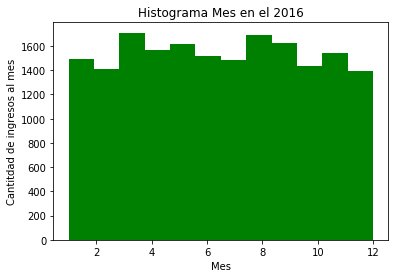

In [60]:
plt.hist(Fecha_2016["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2016')

Text(0.5, 1.0, 'Histograma Mes en el 2017')

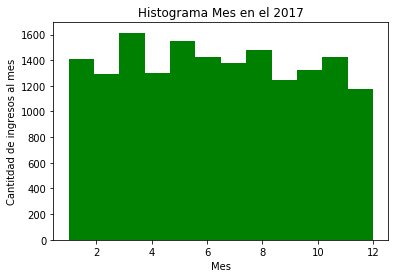

In [61]:
plt.hist(Fecha_2017["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2017')

Text(0.5, 1.0, 'Histograma Mes en el 2018')

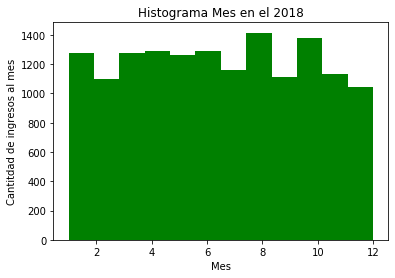

In [62]:
plt.hist(Fecha_2018["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2018')

Text(0.5, 1.0, 'Histograma Mes en el 2019')

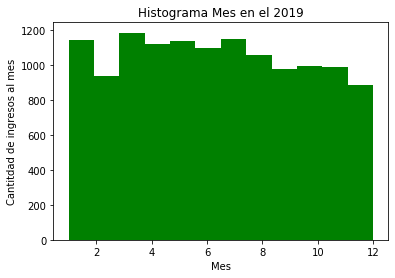

In [63]:
plt.hist(Fecha_2019["month"], facecolor='g', bins = 12)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2019')

Text(0.5, 1.0, 'Histograma Mes en el 2020')

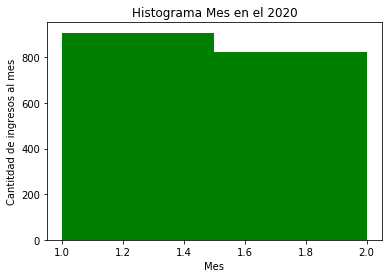

In [64]:
plt.hist(Fecha_2020["month"], facecolor='g', bins = 2)
plt.xlabel('Mes')
plt.ylabel('Cantitdad de ingresos al mes')
plt.title('Histograma Mes en el 2020')

# Vuelvo a graficar los datos de los clientes

Text(0.5, 1.0, 'Histograma por edad')

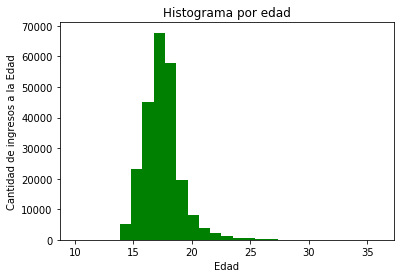

In [65]:
plt.hist(df_cliente_fecha["Edad"], facecolor='g', label = 'str', bins = 27)
plt.xlabel('Edad')
plt.ylabel('Cantidad de ingresos a la Edad')
plt.title('Histograma por edad')

# Cantidad de ingresos por niño

In [66]:
grouped_nino = df_cliente_fecha.groupby("CodNino")
grouped_nino.size()
cantidad_ingresos_nino = grouped_nino.size()
cantidad_ingresos_nino.describe()

count    77033.000000
mean         3.066179
std          3.522509
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         55.000000
dtype: float64

Text(0.5, 1.0, 'Histograma Cantidad de ingresos x niño')

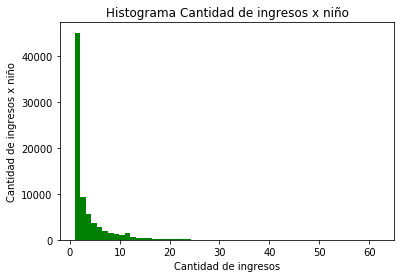

In [67]:
plt.hist(cantidad_delitos_nino, facecolor='g', bins = 55)
plt.xlabel('Cantidad de ingresos')
plt.ylabel('Cantidad de ingresos x niño')
plt.title('Histograma Cantidad de ingresos x niño')

In [68]:
grouped_nino["CodNino"].filter(lambda x: x.count() == 55)

31967    496502
31968    496502
31969    496502
31970    496502
31971    496502
31972    496502
31973    496502
31974    496502
31975    496502
31977    496502
31978    496502
31980    496502
31981    496502
31982    496502
31983    496502
31984    496502
31985    496502
31986    496502
31987    496502
31988    496502
31989    496502
31990    496502
31991    496502
31992    496502
31993    496502
31994    496502
31995    496502
31996    496502
31997    496502
31998    496502
31999    496502
32000    496502
32001    496502
32002    496502
32003    496502
32004    496502
32005    496502
32006    496502
32007    496502
32008    496502
32009    496502
32010    496502
32011    496502
32012    496502
32013    496502
32014    496502
32015    496502
32016    496502
32017    496502
32018    496502
32019    496502
32020    496502
32021    496502
32022    496502
32023    496502
Name: CodNino, dtype: int64

In [69]:
df_cliente_fecha[(df_cliente_fecha["CodNino"]==496502)]

,CodNino,FechaIngreso,Edad
31967,496502,2013-04-30 00:00:00.000,14
31968,496502,2013-06-27 00:00:00.000,14
31969,496502,2013-09-14 00:00:00.000,14
31970,496502,2013-09-17 00:00:00.000,14
31971,496502,2013-10-21 00:00:00.000,14
31972,496502,2014-01-30 00:00:00.000,15
31973,496502,2014-03-05 00:00:00.000,15
31974,496502,2014-08-08 00:00:00.000,15
31975,496502,2014-08-26 00:00:00.000,15
31977,496502,2014-10-03 00:00:00.000,15


# Importo la tabla Causales y Par Causal ingreso

* Con esto haría el cruce para analizar los delitos

In [70]:
df_causales = pd.read_excel(mainpath_xls + "/" + filename, "CAUSALES")
df_par_causal_ingreso = pd.read_excel(mainpath_xls + "/" + filename, "parCausalIngreso")

In [71]:
# Limpio la tabla causales

undesired_columns_causales = ["FechaCreacion", "FechaModificacion"]
all_columns_list = df_causales.columns.values.tolist()
sublist = [x for x in all_columns_list if x not in undesired_columns_causales]
df_causales = df_causales[sublist]
df_causales.head()

,ICodCausalIngreso,ICodIE,ICodTribunalIngreso,CodDelito
0,2165064,3226859,707328.0,810
1,2165065,3226860,707329.0,803
2,2165066,3226861,707330.0,802
3,2165067,3226863,707332.0,803
4,2165068,3226863,707333.0,13001


In [72]:
df_par_causal_ingreso.head()

,CodCausalIngreso,Descripcion,IndVigencia,CodNumCausal
0,283,HURTO DE BIENES PERTENECIENTES A REDES DE SUMI...,V,853
1,152,CONDUCCION ESTADO DE EBRIEDAD CON RESULTADO DE...,V,14003
2,170,HURTO AGRAVADO,V,826
3,35,CONSUMO/PORTE EN LUGARES PUBLICOS O PRIV. CON ...,V,7038
4,135,EXTORSIÓN,V,806


In [73]:
data.head()

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,Edad
0,133944,1989-12-06 00:00:00.000,3292717,1100235,133944,2007-09-05 00:00:00.000,99,18
1,133944,1989-12-06 00:00:00.000,3329394,1100221,133944,2007-11-12 00:00:00.000,100,18
2,133944,1989-12-06 00:00:00.000,3518567,1100225,133944,2009-01-21 00:00:00.000,103,20
3,133944,1989-12-06 00:00:00.000,3586051,1100235,133944,2009-07-22 00:00:00.000,99,20
4,133944,1989-12-06 00:00:00.000,3724427,1140018,133944,2009-07-22 00:00:00.000,99,20


# Agrego las tablas de causales a la tabla condensada

In [74]:
## Hago join con la tabla de causales
data = pd.merge(left = data, right = df_causales,
                        how ="left" , left_on = "ICodIE", right_on = "ICodIE")
data.head()

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,Edad,ICodCausalIngreso,ICodTribunalIngreso,CodDelito
0,133944,1989-12-06 00:00:00.000,3292717,1100235,133944,2007-09-05 00:00:00.000,99,18,2260558.0,738670.0,809.0
1,133944,1989-12-06 00:00:00.000,3329394,1100221,133944,2007-11-12 00:00:00.000,100,18,2309384.0,758853.0,809.0
2,133944,1989-12-06 00:00:00.000,3518567,1100225,133944,2009-01-21 00:00:00.000,103,20,2548601.0,853247.0,810.0
3,133944,1989-12-06 00:00:00.000,3586051,1100235,133944,2009-07-22 00:00:00.000,99,20,2629786.0,892791.0,809.0
4,133944,1989-12-06 00:00:00.000,3724427,1140018,133944,2009-07-22 00:00:00.000,99,20,2806906.0,986322.0,809.0


In [75]:
## Verifico si hay datos sin codigo de delito
cod_delitos_null = len(data[pd.isnull(data.CodDelito)])
print("Numero de Codigos de delito Null: ", cod_delitos_null)

Numero de Codigos de delito Null:  482


In [76]:
# Estos usuarios no tienen relación con el código de intervención
cod_delitos_null = data[pd.isnull(data.CodDelito)]
cod_delitos_null

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,Edad,ICodCausalIngreso,ICodTribunalIngreso,CodDelito
1859,153322,1994-11-21 00:00:00.000,3876293,1070158,153322,2011-09-09 00:00:00.000,100,17,NaN,NaN,NaN
5043,185615,2001-01-23 00:00:00.000,4900334,1090177,185615,2017-07-12 00:00:00.000,104,16,NaN,NaN,NaN
5331,188317,1999-03-26 00:00:00.000,5112454,1070159,188317,2018-08-11 00:00:00.000,104,19,NaN,NaN,NaN
9247,226266,1999-11-13 00:00:00.000,4887264,1010118,226266,2017-06-21 00:00:00.000,77,18,NaN,NaN,NaN
9379,227623,2003-07-12 00:00:00.000,4995836,1090284,227623,2018-01-18 00:00:00.000,102,15,NaN,NaN,NaN
9380,227623,2003-07-12 00:00:00.000,5047547,1090503,227623,2018-01-18 00:00:00.000,102,15,NaN,NaN,NaN
9516,228523,1999-01-18 00:00:00.000,5052038,1010080,228523,2018-04-28 00:00:00.000,104,19,NaN,NaN,NaN
11854,252407,1990-01-26 00:00:00.000,3819441,1070271,252407,2008-03-07 00:00:00.000,99,18,NaN,NaN,NaN
12506,257754,1999-04-06 00:00:00.000,4886968,1050543,257754,2017-06-20 00:00:00.000,77,18,NaN,NaN,NaN
19263,319257,2000-06-13 00:00:00.000,5024105,1050352,319257,2018-03-15 00:00:00.000,100,18,NaN,NaN,NaN


In [77]:
## Hago join con la tabla par causal ingreso
data = pd.merge(left = data, right = df_par_causal_ingreso,
                        how ="left" , left_on = "CodDelito", right_on = "CodNumCausal")
data.head()

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,Edad,ICodCausalIngreso,ICodTribunalIngreso,CodDelito,CodCausalIngreso,Descripcion,IndVigencia,CodNumCausal
0,133944,1989-12-06 00:00:00.000,3292717,1100235,133944,2007-09-05 00:00:00.000,99,18,2260558.0,738670.0,809.0,124.0,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,V,809.0
1,133944,1989-12-06 00:00:00.000,3329394,1100221,133944,2007-11-12 00:00:00.000,100,18,2309384.0,758853.0,809.0,124.0,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,V,809.0
2,133944,1989-12-06 00:00:00.000,3518567,1100225,133944,2009-01-21 00:00:00.000,103,20,2548601.0,853247.0,810.0,125.0,ROBO EN LUGAR NO HABITADO,V,810.0
3,133944,1989-12-06 00:00:00.000,3586051,1100235,133944,2009-07-22 00:00:00.000,99,20,2629786.0,892791.0,809.0,124.0,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,V,809.0
4,133944,1989-12-06 00:00:00.000,3724427,1140018,133944,2009-07-22 00:00:00.000,99,20,2806906.0,986322.0,809.0,124.0,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,V,809.0


# Top Delitos Totales

In [159]:
Top_Delitos = data.groupby("Descripcion")
Top_Delitos = Top_Delitos.size().sort_values(ascending=False).head(20)
Top_Delitos

Descripcion
ROBO CON INTIMIDACIÓN                                                                        57435
ROBO CON VIOLENCIA                                                                           40063
ROBO EN LUGAR HABITADO O DESTINADO A LA HABITACIÓN                                           36092
RECEPTACION                                                                                  24240
HURTO SIMPLE DE MEDIA A MENOS DE 4 UTM                                                       23702
ROBO POR SORPRESA                                                                            17458
ROBO EN LUGAR NO HABITADO                                                                    16800
ROBO EN BIENES NACIONALES DE USO PÚBLICO                                                     14588
QUEBRANTAMIENTO                                                                               6556
TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4)                                                       647

# Top delitos por año

In [79]:
# Agrego año y mes a la data dado que servira para hacer otro tipo de calculos
data["AnoIngreso"] = pd.to_datetime(data["FechaIngreso"]).apply(lambda x: x.year)
data["MesIngreso"] = pd.to_datetime(data["FechaIngreso"]).apply(lambda x: x.month)

## Creo el data frame con la info agrupada Delito-año

In [80]:
Anos=data["AnoIngreso"].unique().tolist()
delito = data["Descripcion"].unique().tolist()

In [81]:
cantidad_delito_ano = []
ano_data = []
delito_data = []
for i in range(len(Anos)):
    for j in range(len(delito)):
        ano_data.append(Anos[i])
        delito_data.append(delito[j])
        cantidad_delito_ano.append(len(data[(data["AnoIngreso"]==Anos[i]) & (data["Descripcion"] == delito[j])]))

In [82]:
grouped_year_crime = pd.DataFrame(
    {
        "Ano" : ano_data,
        "Delito" : delito_data,
        "cantidad_delito_ano" : cantidad_delito_ano
     }
)

## Selecciono el top 20 por año para graficar la evolución

In [83]:
grouped_year_crime = grouped_year_crime.sort_values(by=["Ano", "cantidad_delito_ano"],ascending=False)

In [95]:
Top_delitos_total=[]
for i in range(len(Anos)):
    Data_Top_delitos= grouped_year_crime[(grouped_year_crime["Ano"]==Anos[i])].head(20)
    Data_delitos = Data_Top_delitos["Delito"]
    Top_delitos= Data_delitos.tolist()
    for i in range(20):
        Top_delitos_total.append(Top_delitos[i])

In [116]:
#Elimino los duplicados del arreglo
Top_delitos_total = list(set(Top_delitos_total))

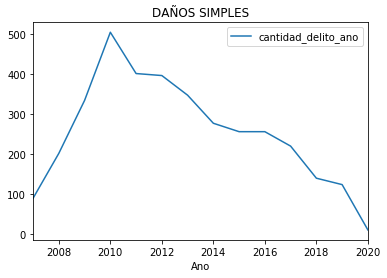

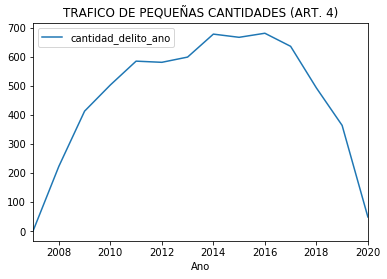

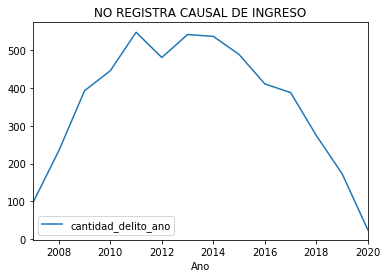

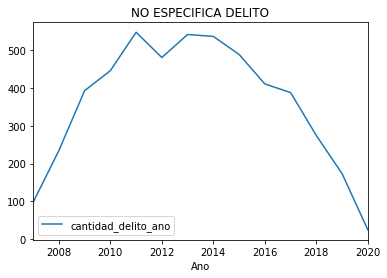

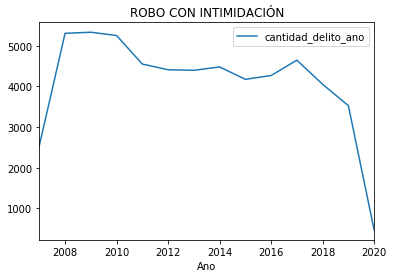

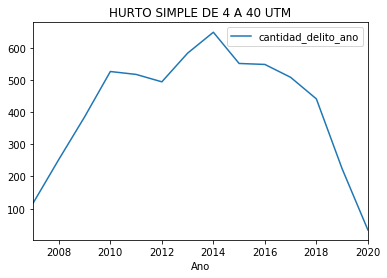

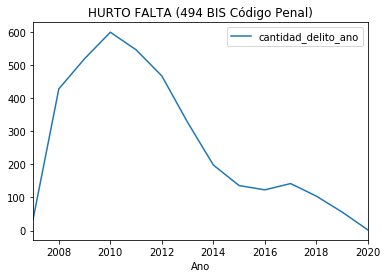

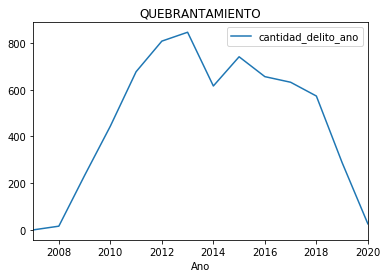

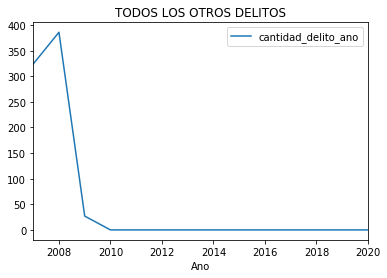

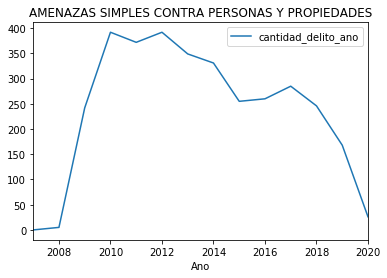

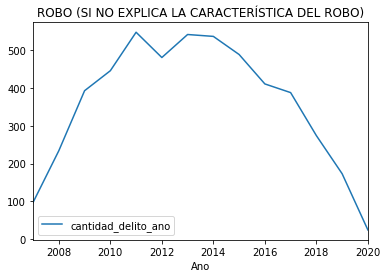

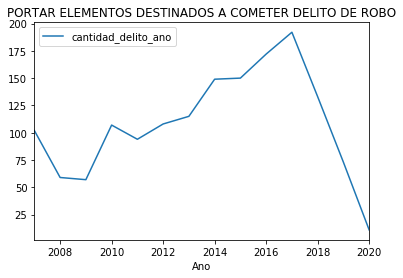

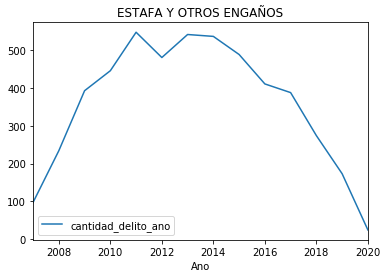

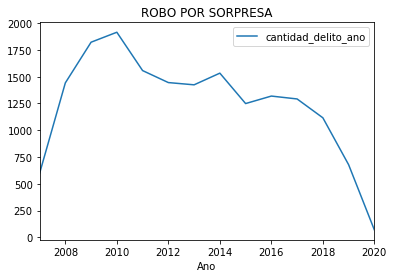

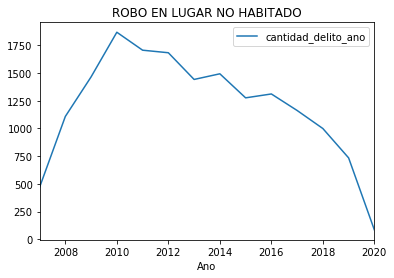

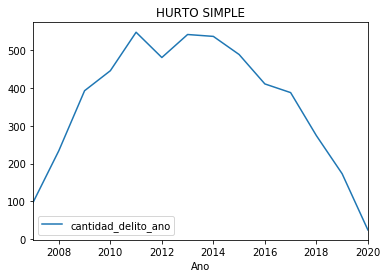

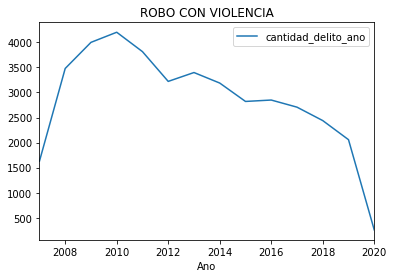

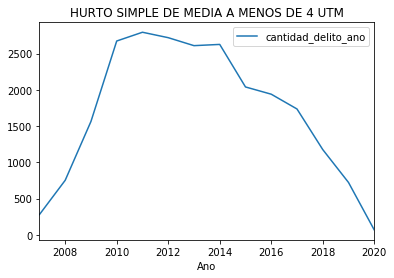

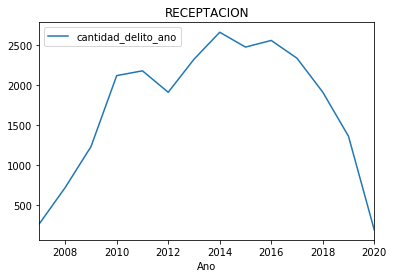

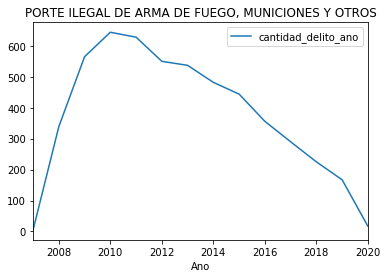

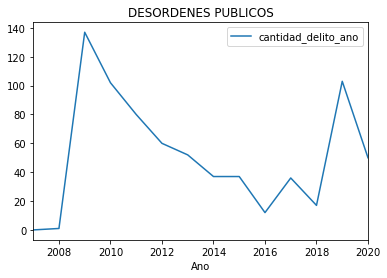

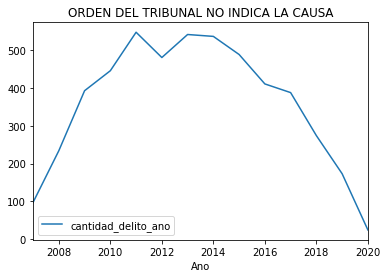

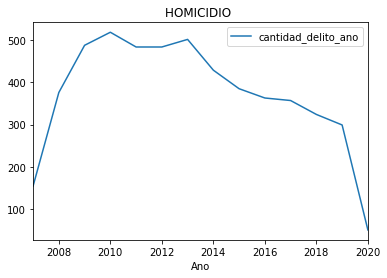

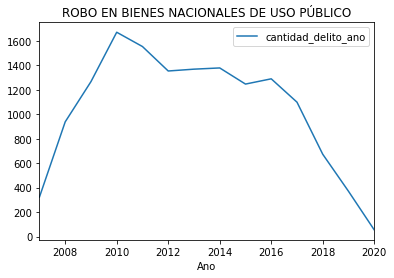

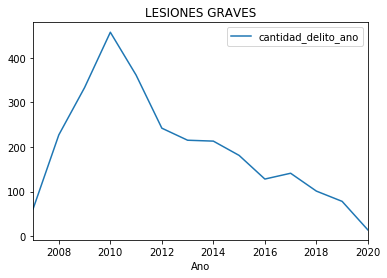

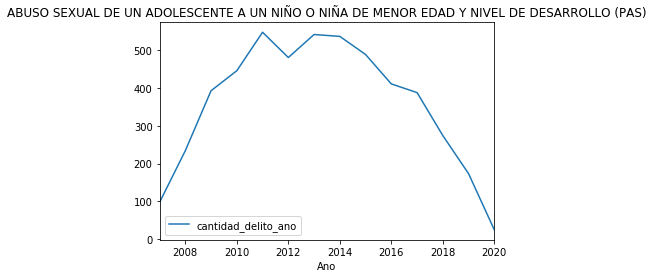

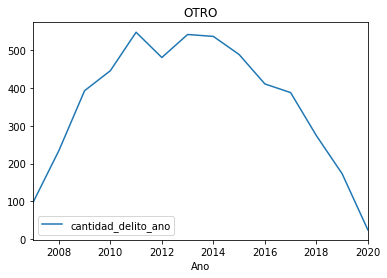

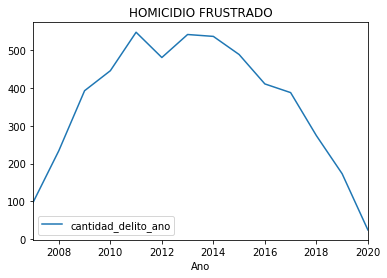

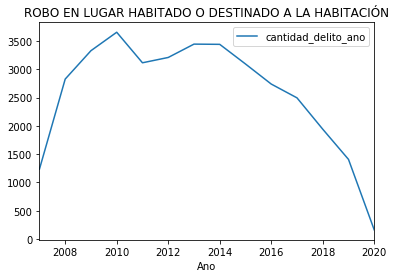

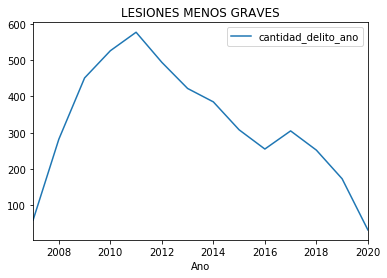

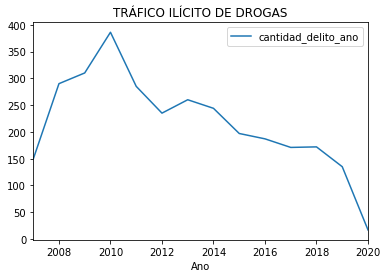

In [157]:
for i in range(len(Top_delitos_total)):
    grouped_year_top_crimes=grouped_year_crime[(grouped_year_crime["Delito"]==Top_delitos_total[i])]
    grouped_year_top_crimes.plot(kind = "line", x = "Ano", y = "cantidad_delito_ano", title=Top_delitos_total[i])


In [165]:
data.head()

,codnino,fechanacimiento,ICodIE,CodProyecto,CodNino,FechaIngreso,CodModeloIntervencion,Edad,ICodCausalIngreso,ICodTribunalIngreso,CodDelito,CodCausalIngreso,Descripcion,IndVigencia,CodNumCausal,AnoIngreso,MesIngreso
0,133944,1989-12-06 00:00:00.000,3292717,1100235,133944,2007-09-05 00:00:00.000,99,18,2260558.0,738670.0,809.0,124.0,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,V,809.0,2007,9
1,133944,1989-12-06 00:00:00.000,3329394,1100221,133944,2007-11-12 00:00:00.000,100,18,2309384.0,758853.0,809.0,124.0,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,V,809.0,2007,11
2,133944,1989-12-06 00:00:00.000,3518567,1100225,133944,2009-01-21 00:00:00.000,103,20,2548601.0,853247.0,810.0,125.0,ROBO EN LUGAR NO HABITADO,V,810.0,2009,1
3,133944,1989-12-06 00:00:00.000,3586051,1100235,133944,2009-07-22 00:00:00.000,99,20,2629786.0,892791.0,809.0,124.0,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,V,809.0,2009,7
4,133944,1989-12-06 00:00:00.000,3724427,1140018,133944,2009-07-22 00:00:00.000,99,20,2806906.0,986322.0,809.0,124.0,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,V,809.0,2009,7


In [169]:
grouped_delito_otro = data[(data["Descripcion"]=="ABUSO SEXUAL DE UN ADOLESCENTE A UN NIÑO O NIÑA DE MENOR EDAD Y NIVEL DE DESARROLLO (PAS)")]
double_group = grouped_delito_otro.groupby(["AnoIngreso"])
double_group.size()

AnoIngreso
2007     97
2008    234
2009    393
2010    446
2011    548
2012    481
2013    542
2014    537
2015    489
2016    411
2017    388
2018    274
2019    173
2020     24
dtype: int64